# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Crypto variables
my_btc = 1.2
my_eth = 5.3
# Set current amount of crypto assets
crypto_data = {
    "Crypto": [my_btc, my_eth]
}

# Set the crypto tickers
crypto = ["BTC", "ETH"]
# Create the crypto DataFrame
df_crypto = pd.DataFrame(crypto_data, index=crypto)
df_crypto

,Crypto
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Execute 'GET' request using url
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18813693,
            "total_supply": 18813693,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46101.0,
                    "volume_24h": 30911537180,
                    "market_cap": 867732398749,
                    "percentage_change_1h": -0.16793681992343,
                    "percentage_change_24h": 0.867405540791215,
                    "percentage_change_7d": -7.82191727316301,
                    "percent_change_1h": -0.16793681992343,
                    "percent_change_24h": 0.867405540791215,
                    "percent_change_7d": -7.82191727316301
                },
                "CAD": {
                    "price": 58506.7791,
                    "volume_24h": 39229831835.138,
                    

In [6]:
# Select value and store as a variable
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(btc_price)

46101.0


In [7]:
# Fetch current ETH price
# Execute 'GET' request using url
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117493507,
            "total_supply": 117493507,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3445.02,
                    "volume_24h": 19952564947,
                    "market_cap": 405372235366,
                    "percentage_change_1h": -0.0079065545151063,
                    "percentage_change_24h": 3.42522011866107,
                    "percentage_change_7d": -11.5512330677277,
                    "percent_change_1h": -0.0079065545151063,
                    "percent_change_24h": 3.42522011866107,
                    "percent_change_7d": -11.5512330677277
                },
                "CAD": {
                    "price": 4372.074882,
                    "volume_24h": 25321800174.2377,
             

In [8]:
# Select value and store as a variable
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

3445.02


In [9]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55321.20
The current value of your 5.3 ETH is $18258.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    

In [25]:
# Format current date as ISO format
# Set start and end datetimes between now and 3 years ago.
today = pd.Timestamp("2020-09-09", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
start_date = pd.Timestamp("2018-09-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-09", tz="America/New_York").isoformat()

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
df_ticker = df_ticker.sort_index(ascending=False)


# Preview DataFrame
df_ticker.head(10)

AGG                                          \
                              open      high       low    close     volume   
time                                                                         
2021-09-09 00:00:00-04:00  115.840  116.1470  115.7550  116.100  3232335.0   
2021-09-08 00:00:00-04:00  115.700  115.8200  115.6200  115.740  3084384.0   
2021-09-07 00:00:00-04:00  115.640  115.6457  115.4737  115.550  3190893.0   
2021-09-03 00:00:00-04:00  115.840  115.8900  115.7707  115.850  4172690.0   
2021-09-02 00:00:00-04:00  116.020  116.0600  115.9200  116.060  3735912.0   
2021-09-01 00:00:00-04:00  116.020  116.0200  115.8100  115.915  3822304.0   
2021-08-31 00:00:00-04:00  116.180  116.2850  116.0200  116.070  5628295.0   
2021-08-30 00:00:00-04:00  116.015  116.2200  116.0000  116.210  3261203.0   
2021-08-27 00:00:00-04:00  115.810  116.1000  115.7146  116.100  5361646.0   
2021-08-26 00:00:00-04:00  115.760  115.7900  115.6444  115.785  4730638.0   

                              SPY                                       
                             open    high       low    close    volume  
time                                                                    
2021-09-09 00:00:00-04:00  450.70  452.57  448.7200  448.940  51603442  
2021-09-08 00:00:00-04:00  450.89  451.67  448.8600  450.960  50695626  
2021-09-07 00:00:00-04:00  452.71  452.81  450.7423  451.520  46091753  
2021-09-03 00:00:00-04:00  451.98  453.63  451.5500  453.060  37843082  
2021-09-02 00:00:00-04:00  453.32  454.05  451.9100  453.195  39220785  
2021-09-01 00:00:00-04:00  452.58  453.11  451.5450  451.810  42568610  
2021-08-31 00:00:00-04:00  452.13  452.49  450.9200  451.610  48724399  
2021-08-30 00:00:00-04:00  450.99  453.07  450.7100  452.220  41870839  
2021-08-27 00:00:00-04:00  447.12  450.65  447.0600  450.190  54848833  
2021-08-26 00:00:00-04:00  448.61  448.86  446.1600  446.270  53455704

In [28]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $116.10
Current SPY closing price: $448.94


In [29]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22447.00
The current value of your 200 AGG shares is $23220.00


### Savings Health Analysis

In [30]:
# Set monthly household income
monthly_income = 12000
# Set variables for total value of cryptos and shares
crypto_total_value = my_btc_value + my_eth_value
shares_total_value = my_agg_value + my_spy_value

print(crypto_total_value)
print(shares_total_value)

73579.806
45667.0


In [33]:
# Consolidate financial assets data
all_data = {
    "Amount": [crypto_total_value, shares_total_value]
}

# Set the crypto tickers
savings = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(all_data, index=savings)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,73579.806
Shares,45667.000


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='Amount'>

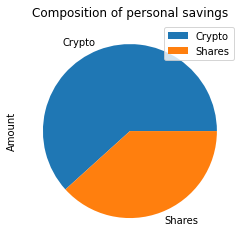

In [34]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Composition of personal savings')

In [37]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total_value + shares_total_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations you have more than enough current savings in this emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations on reaching this financial goal.')
elif total_savings < emergency_fund:
    print(f'You are: ${(emergency_fund - total_savings)} from reaching your goal.')

Congratulations you have more than enough current savings in this emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [38]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-09', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2017-09-19 00:00:00-04:00  109.91  109.9100  109.785  109.820  1220416.0   
2017-09-20 00:00:00-04:00  109.84  109.9194  109.590  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.680  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.750  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.820  110.025  3031529.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-09-19 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-09-20 00:00:00-04:00  250.06  250.1900  248.920  250.09  42770537.0  
2017-09-21 00:00:00-04:00  249.89  249.9800  249.185  249.40  29220256.0  
2017-09-22 00:00:00-04:00  249.05  249.6300  249.020  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.14  249.5532  248.080  248.94  42826453.0

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

# Print the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2017-09-19 00:00:00-04:00  109.91  109.9100  109.785  109.820  1220416.0   
2017-09-20 00:00:00-04:00  109.84  109.9194  109.590  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.680  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.750  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.820  110.025  3031529.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-09-19 00:00:00-04:00          NaN     NaN       NaN      NaN     NaN   
2017-09-20 00:00:00-04:00    -0.001093  250.06  250.1900  248.920  250.09   
2017-09-21 00:00:00-04:00    -0.000182  249.89  249.9800  249.185  249.40   
2017-09-22 00:00:00-04:00     0.000957  249.05  249.6300  249.020  249.42   
2017-09-25 00:00:00-04:00     0.002186  249.14  249.5532  248.080  248.94   

                                                    
                               volume daily_return  
time                                                
2017-09-19 00:00:00-04:00         NaN          NaN  
2017-09-20 00:00:00-04:00  42770537.0          NaN  
2017-09-21 00:00:00-04:00  29220256.0    -0.002759  
2017-09-22 00:00:00-04:00  31078666.0     0.000080  
2017-09-25 00:00:00-04:00  42826453.0    -0.001924

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\ljmac\Desktop\gitrepo\financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997813,0.994182,0.996841,1.000815,0.993877,1.011558,1.011017,1.004561,0.982859,0.992410,...,1.006630,0.993606,1.009260,0.992078,1.010468,0.997208,0.995662,1.003058,0.997429,1.001017
2,1.005940,1.014182,0.995424,1.003045,1.011424,1.010491,1.018200,1.007264,0.981482,0.983004,...,1.003593,1.003507,1.006736,1.001432,1.023214,0.999451,1.004648,1.011834,0.990319,0.994927
3,0.996358,1.021190,0.996365,1.001013,1.000725,1.015535,1.011399,1.013981,0.975787,0.976523,...,1.004521,1.004264,1.001734,0.999318,1.024994,1.001439,1.005225,1.020582,0.996165,0.996610
4,0.998703,1.020729,1.011895,1.006801,1.004224,1.004654,1.012800,1.011520,0.986933,0.965316,...,1.002242,0.988269,0.998040,1.001311,1.031508,1.015652,1.003799,1.022125,1.006690,1.008479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.927340,17.611500,12.971587,27.450786,16.297953,8.911506,56.441854,21.447309,17.084313,14.134376,...,9.773582,23.066987,48.368001,8.951005,11.795768,22.700076,26.114659,74.378488,12.159723,7.575824
7557,13.883077,17.702965,13.185126,27.061104,16.221041,8.897768,56.606424,21.681701,17.448136,14.132727,...,9.784277,22.910300,47.051534,8.840814,11.762508,22.857250,26.240328,74.435712,12.121250,7.572104
7558,13.663326,17.629555,13.123343,27.021507,16.111099,8.900393,56.873941,21.616856,17.606267,14.168747,...,9.764291,23.079732,47.522083,8.875249,11.784688,22.726271,26.060762,75.603492,12.086500,7.628918
7559,13.657368,17.551388,13.184516,27.011546,16.067645,8.870551,56.805111,21.548994,17.589980,14.074410,...,9.901241,23.141603,47.914237,8.887991,11.980079,22.634277,26.150429,74.795605,11.978095,7.693401


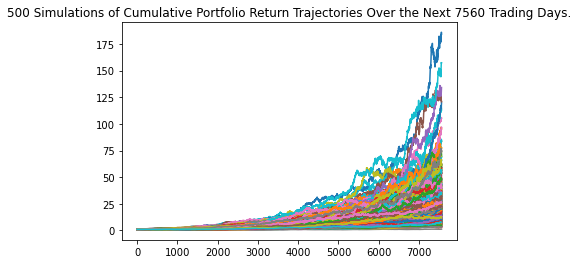

In [60]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

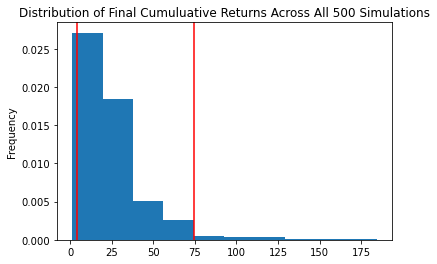

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             25.311952
std              20.877831
min               1.245731
25%              12.704630
50%              19.735386
75%              31.036639
max             184.237024
95% CI Lower      4.167104
95% CI Upper     74.328261
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [63]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83342.08 and $1486565.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125013.12 and $2229847.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")